In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from math import sqrt
from env import host, user, pwd
from env import get_db_url

import warnings
warnings.filterwarnings("ignore")


import acquire_data
import prepare_data

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
### acquire the data

titanic_df = acquire_data.get_titanic_data()

In [3]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
#### in retrospect it is easier to dummy the pclass column before the prep and split
dummy_df = pd.get_dummies(titanic_df['pclass'], drop_first=False)
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)


In [5]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,1,2,3
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,1,0,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,0,1,0
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,1,0,0
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,1,0,0


In [6]:
## prepare and split the data
train, validate, test = prepare_data.prep_titanic_data(titanic_df)


In [7]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,1,2,3,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0,0,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,0,0,1,0,1,0,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,0,0,1,0,1,0,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,1,0,1,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,1,0,0,1,0,1,0,0


In [8]:
#### Preprocessing for modeling

##### we need to drop the target of survived column ####
########## and make the x and y for each set 

x_train = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = train.survived

x_validate = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = validate.survived

x_test = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = test.survived






In [9]:
y_train

583    0
165    1
50     0
259    1
306    1
      ..
313    0
636    0
222    0
485    0
744    1
Name: survived, Length: 498, dtype: int64

In [10]:
##### take a look at the data
x_train.shape, x_validate.shape, x_test.shape

((498, 14), (214, 14), (179, 14))

In [11]:
# y is our basline survive column
y_train.shape, y_validate.shape, y_test.shape

((498,), (214,), (179,))

In [12]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [13]:
# The mode is a great baseline
#### applying a dot mode() to the y_train get us baseline of survive column

baseline = y_train.mode()

In [14]:
baseline

0    0
Name: survived, dtype: int64

In [15]:
# Produce a boolean array with True representing a match between 
# the baseline prediction and reality

# the reality is y = 0
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [16]:
# Make the model
######## max_depth=3 good start and random state to replicate results
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
#           .fit 
# which means over write tree1
tree1 = tree1.fit(x_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
#                   .preditct
y_predictions = tree1.predict(x_train)

In [17]:
## this is what the unplotted decision tree looks like
y_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

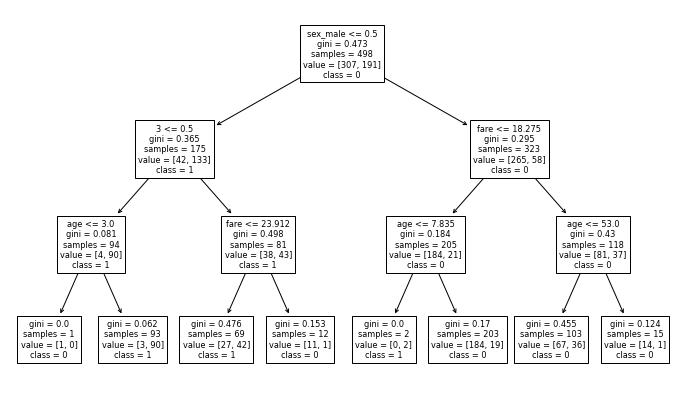

In [19]:
plt.figure(figsize=(12, 7))

##### plot_tree ( the model, feature_names = x_train.columns, class_names are the list 
#                                                              of the 1 & 0's)
plot_tree(tree1, feature_names=x_train.columns, class_names=['0','1'])
#### to show us the viz
plt.show()

In [21]:
# printing the string and after : is the NOT SURE ASK FOR CLARIFICATION
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


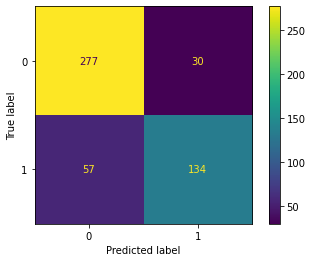

In [23]:
# calling the tree1 x and y trains into confusion matrix viz
plot_confusion_matrix(tree1, x_train, y_train)

In [24]:
##### calling classification_report function on our baseline train and predictions
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [25]:
##### Produce the classification report on the actual y values and this 
#####        model's predicted y values           output_dict=True
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


In [27]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(x_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

In [28]:
# Max depth of 15+ produces the highest accuracy

In [30]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.803738,0.049675
5,6,0.865462,0.789720,0.075742
6,7,0.877510,0.757009,0.120501
7,8,0.897590,0.761682,0.135908
8,9,0.923695,0.761682,0.162013
9,10,0.937751,0.775701,0.162050


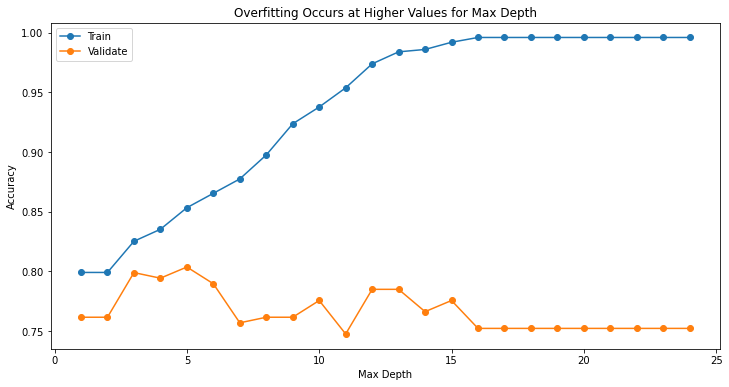

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.853414,0.803738,0.049675
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.789720,0.075742
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
